In [1]:
import numpy as np
import pandas as pd
from numpy import array
from scipy import integrate
import matplotlib.pyplot as plt
import os
import sys
import subprocess
import itertools as itt
from multiprocessing import Pool

In [2]:
notebooks_base = os.environ["NOTEBOOKS"]
ms_base = os.path.join(notebooks_base, 'bit/ms')

http://www.ebi.ac.uk/biomodels-main/BIOMD0000000026

# Task 7

Perform numeric simulations using the given parameter values and various initial values fulfilling the following conditions:
    
$x_5 +x_8 +x_9 +x_{10} +x_{11} = 100$

$x_4+x_6+x_7 = 50$

$x_1 +x_2 +x_3 +x_6 +x_7 +x_8 +x_9 +x_{10} +x_{11} = 200$

These constraints are produced by the integration of each function in the cascade, and the assignment of a constant. These constants will be varied to understand the possible states of the system. Other constants can't be varied because they are physical kinetic constnts, while these refer to physical concentrations/mole counts.

To generate appropriate starting values, this system is reformulated with matricies and solved using SAGE.

$\begin{bmatrix}
100 \\ 
50 \\ 
200
\end{bmatrix}=
\begin{bmatrix}
0 & 0 & 0 & 0 & 1 & 0 & 0 & 1 & 1 & 1 & 1 \\
0 & 0 & 0 & 1 & 0 & 1 & 1 & 0 & 0 & 0 & 0 \\
1 & 1 & 1 & 0 & 0 & 1 & 1 & 1 & 1 & 1 & 1
\end{bmatrix}
\begin{bmatrix}
x_1 \\ 
\vdots \\ 
x_{11}
\end{bmatrix}
$

That reduces to this, where $y_i$ is a slack variable.


```python
coeff = matrix(QQ, [[0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1],
                    [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0],
                    [1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1]])
n = coeff.ncols()
const = vector(QQ, [100, 50, 200])

c = coeff.solve_right(const)
aug = coeff.augment(const)
reduced = aug.rref()


N = coeff.right_kernel(basis='pivot').basis()

v = vector(QQ, [0,2,3,4,5,6,7,8])  # must be 8 long

 
Nm = matrix(QQ, N)

soln = c + v * Nm

check = sum(soln[i]*coeff.column(i) for i in range(n))
check == const


```

$\begin{bmatrix}
x_1 & \dots & x_{11}
\end{bmatrix}=
\begin{bmatrix}  
200 & 0 & 0 & 50 & 100 & 0 & 0 & 0 & 0 & 0 & 0
\end{bmatrix} + 
\begin{bmatrix}
y_1 & \dots & y_8
\end{bmatrix}
\begin{bmatrix}
-1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
-1 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
-1 & 0 & 0 & -1 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
-1 & 0 & 0 & -1 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
-1 & 0 & 0 & 0 & -1 & 0 & 0 & 1 & 0 & 0 & 0 \\
-1 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & 1 & 0 & 0 \\
-1 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & 0 & 1 & 0 \\
-1 & 0 & 0 & 0 & -1 & 0 & 0 & 0 & 0 & 0 & 1
\end{bmatrix}
$

In [3]:
a, b, c = 100, 50, 200

orig_const = array([a,b,c])
orig_coeff = array([[0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1],
                    [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0],
                    [1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1]])

In [4]:
coeff = array([[-1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
               [-1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
               [-1,  0,  0, -1,  0,  1,  0,  0,  0,  0,  0],
               [-1,  0,  0, -1,  0,  0,  1,  0,  0,  0,  0],
               [-1,  0,  0,  0, -1,  0,  0,  1,  0,  0,  0],
               [-1,  0,  0,  0, -1,  0,  0,  0,  1,  0,  0],
               [-1,  0,  0,  0, -1,  0,  0,  0,  0,  1,  0],
               [-1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  1]])

const = array([c, 0, 0, b, a, 0, 0, 0, 0, 0, 0])

In [5]:
v = np.random.uniform(size=8)
v

array([ 0.38192851,  0.95275511,  0.0317781 ,  0.1208306 ,  0.1501823 ,
        0.20967552,  0.49161606,  0.54473496])

In [6]:
start = const + v @ coeff
assert np.allclose(orig_const, sum(start[i] * orig_coeff[:,i] for i in range(11)))

start


array([  1.97116499e+02,   3.81928506e-01,   9.52755108e-01,
         4.98473913e+01,   9.86037912e+01,   3.17781002e-02,
         1.20830597e-01,   1.50182304e-01,   2.09675517e-01,
         4.91616059e-01,   5.44734960e-01])

In [7]:
def mapk_cascade(y, t, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15, c16):
    x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11 = y
    
    y1 = c2 * x6 + c15 * x11 - c1 * x1 * x4 - c16 * x1 * x5
    y2 = c3 * x6 + c5 * x7 + c10 * x9 + c13 * x10 - x2 * x5 * (c11 + c12) - c4 * x2 * x4
    y3 = c6 * x7 + c8 * x8 - c7 * x3 * x5
    y4 = x6 * (c2 + c3) + x7 * (c5 + c6) - c1 * x1 * x4 - c4 * x2 * x4
    y5 = c8 * x8 + c10 * x9 + c13 * x10 + c15 * x11 - x2 * x5 * (c11 + c12) - c7 * x3 * x5 - c16 * x1 * x5 
    y6 = c1 * x1 * x4 - x6 * (c2 + c3)
    y7 = c4 * x2 * x4 - x7 * (c5 + c6)
    y8 = c7 * x3 * x5 - x8 * (c8 + c9)
    y9 = c9 * x8 - c10 * x9 + c11 * x2 * x5
    y10 = c12 * x2 * x5 - x10 * (c13 + c14)
    y11 = c14 * x10 - c15 * x11 + c16 * x1 * x5
    
    return [y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11]

In [8]:
k1 = 0.02
k2 = 1
k3 = 0.01
k4 = 0.032
k5 = 1
k6 = 15
k7 = 0.045
k8 = 1
k9 = 0.092
k10 = 1;
k11 = 0.01
k12 = 0.01
k13 = 1
k14 = 0.5
k15 = 0.086
k16 = 0.0011

In [9]:
t = np.linspace(1, 100, 1000)
soln = integrate.odeint(mapk_cascade, start, t, args=(k1, k2, k3, k4, k5, k6, k7, k8, k9, k10, k11, k12, k13, k14, k15, k16))

Do the trajectories converge to the same value for all those initial values? Do the values of the following sums stay constant?

1. $x_1 + x_2 +x_3 +x_4 +x_5$
2. $x_5 +x_8 +x_9 +x_{10} +x_{11}$
3. $x_4 + x_6 + x_7$
4. $x_1 +x_2 +x_3 +x_6 +x_7 +x_8 +x_9 +x_{10} +x_{11}$
5. $x_1 +x_2 +x_3 +x_4 +x_5 +x_6 +x_7 +x_8 +x_9 +x_{10} +x_{11}$

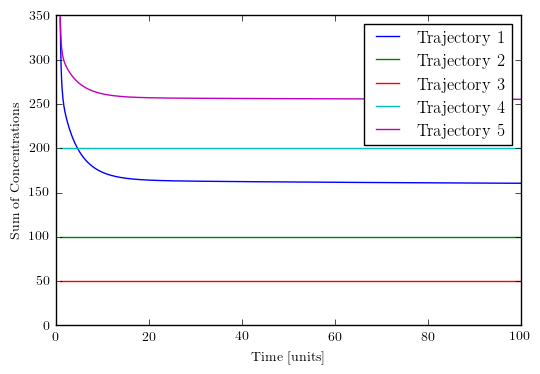

In [10]:
trajectory1 = soln[:,0] + soln[:,1] + soln[:,2] + soln[:,3] + soln[:,4]
trajectory2 = soln[:,4] + soln[:,7] + soln[:,8] + soln[:,9] + soln[:,10]
trajectory3 = soln[:,3] + soln[:,5] + soln[:,6]
trajectory4 = soln[:,0] + soln[:,1] + soln[:,2] + soln[:,5] + soln[:,6] + soln[:,7] + soln[:,8] + soln[:,9] + soln[:,10]
trajectory5 = soln[:,0] + soln[:,1] + soln[:,2] + soln[:,3] + soln[:,4] + soln[:,5] + soln[:,6] + soln[:,7] + soln[:,8] + soln[:,9] + soln[:,10]

plt.plot(t, trajectory1)
plt.plot(t, trajectory2)
plt.plot(t, trajectory3)
plt.plot(t, trajectory4)
plt.plot(t, trajectory5)
plt.xlabel('Time [units]')
plt.ylabel('Sum of Concentrations')
plt.legend(['Trajectory 1', 'Trajectory 2', 'Trajectory 3', 'Trajectory 4', 'Trajectory 5'])
plt.show()

# Task 8

Perform similar computations as in Task 7, but now the initial values should obey:

$x_5 +x_8 +x_9 +x_{10} +x_{11} = 100$

$x_4+x_6+x_7 = 50$

$x_1 +x_2 +x_3 +x_6 +x_7 +x_8 +x_9 +x_{10} +x_{11} = 500$

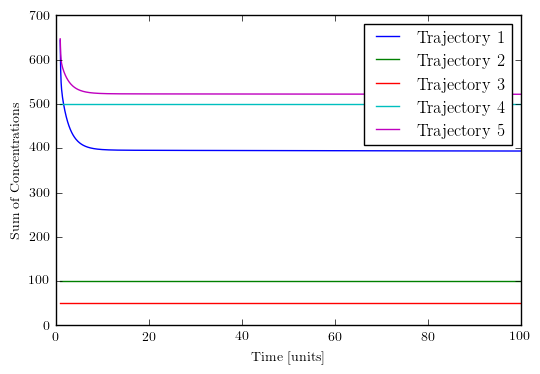

In [11]:
a, b, c = 100, 50, 500

const = array([c, 0, 0, b, a, 0, 0, 0, 0, 0, 0])
v = np.random.uniform(size=8)
start = const + v @ coeff

t = np.linspace(1, 100, 1000)
soln = integrate.odeint(mapk_cascade, start, t, args=(k1, k2, k3, k4, k5, k6, k7, k8, k9, k10, k11, k12, k13, k14, k15, k16))

trajectory1 = soln[:,0] + soln[:,1] + soln[:,2] + soln[:,3] + soln[:,4]
trajectory2 = soln[:,4] + soln[:,7] + soln[:,8] + soln[:,9] + soln[:,10]
trajectory3 = soln[:,3] + soln[:,5] + soln[:,6]
trajectory4 = soln[:,0] + soln[:,1] + soln[:,2] + soln[:,5] + soln[:,6] + soln[:,7] + soln[:,8] + soln[:,9] + soln[:,10]
trajectory5 = soln[:,0] + soln[:,1] + soln[:,2] + soln[:,3] + soln[:,4] + soln[:,5] + soln[:,6] + soln[:,7] + soln[:,8] + soln[:,9] + soln[:,10]

plt.plot(t, trajectory1)
plt.plot(t, trajectory2)
plt.plot(t, trajectory3)
plt.plot(t, trajectory4)
plt.plot(t, trajectory5)
plt.xlabel('Time [units]')
plt.ylabel('Sum of Concentrations')
plt.legend(['Trajectory 1', 'Trajectory 2', 'Trajectory 3', 'Trajectory 4', 'Trajectory 5'])
plt.show()

# Task 9

1. Perform the computations of Task 8 for varying values of $k_{19} \in [200, 500]$. 4
2. Determine approximately (by bisecting values up to one digit of occu- racy) the value of $k_{19}$ at which the system changes its behavior (from a single fixed point to 3 fixed points).


In [12]:
def parse_bertini_main_data(fl):
    """
    :param fl: file object of the main_data output from Bertini 1.5.1
    :type f1: file-like object 
    :return: list of solutions
    """
    it = (line.strip() for line in fl)
    number_variables = next(it)
    solution_dimension = int(number_variables[21:])
    variables = next(it)
    rank = next(it)
    _ = next(it)
    dimension_title = next(it)
    _ = next(it)
    non_singular_title = next(it)
    
    line = next(it)
    solns = []
    while line == '---------------':
        path_number = next(it)
        component_number = next(it)
        estimated_condition_number = next(it)
       
        components = []
        for i in range(solution_dimension):
            component = next(it)

            re, im = component.split(' ')
            component = float(re) + 1j * float(im)
            components.append(component)
        solns.append(components)
        
        multiplicity = next(it)
        deflations = next(it)
        line = next(it)
    return solns

In [13]:
def triage_solns(solns, atol=1e-5):
    keep = []
    for soln in solns:
        soln = np.array(soln)
        re = np.real(soln)
        im = np.imag(soln)
        if np.allclose(np.zeros(shape=im.shape), im, atol=atol) and np.all(re >= 0):            
            keep.append(re)        
    return np.array(keep)

In [14]:
bi = """
CONFIG
TRACKTYPE: 1;
INPUT
function y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11, y12, y13, y14;
variable_group x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11;
constant k1, k2, k3, k4, k5, k6, k7, k8, k9, k10, k11, k12, k13, k14, k15, k16, k17, k18, k19;

k1 = 0.02;
k2 = 1;
k3 = 0.01;
k4 = 0.032;
k5 = 1;
k6 = 15;
k7 = 0.045;
k8 = 1;
k9 = 0.092;
k10 = 1;
k11 = 0.01;
k12 = 0.01;
k13 = 1;
k14 = 0.5;
k15 = 0.086;
k16 = 0.0011;

k17 = 100;
k18 = 50;
k19 = {};

y1 = k2 * x6 + k15 * x11 - k1 * x1 * x4 - k16 * x1 * x5;
y2 = k3 * x6 + k5 * x7 + k10 * x9 + k13 * x10 - x2 * x5 * (k11 + k12) - k4 * x2 * x4;
y3 = k6 * x7 + k8 * x8 - k7 * x3 * x5;
y4 = x6 * (k2 + k3) + x7 * (k5 + k6) - k1 * x1 * x4 - k4 * x2 * x4;
y5 = k8 * x8 + k10 * x9 + k13 * x10 + k15 * x11 - x2 * x5 * (k11 + k12) - k7 * x3 * x5 - k16 * x1 * x5; 
y6 = k1 * x1 * x4 - x6 * (k2 + k3);
y7 = k4 * x2 * x4 - x7 * (k5 + k6);
y8 = k7 * x3 * x5 - x8 * (k8 + k9);
y9 = k9 * x8 - k10 * x9 + k11 * x2 * x5;
y10 = k12 * x2 * x5 - x10 * (k13 + k14);
y11 = k14 * x10 - k15 * x11 + k16 * x1 * x5;

y12 = x5 - k17 + x8 + x9 + x10 + x11;
y13 = x4 - k18 + x6 + x7;
y14 = x1 - k19 + x2 + x3 + x6 + x7 + x8 + x9 + x10 + x11;

END;
"""

In [15]:
opt_folder = os.path.expanduser('~/dev/notebooks/bit/ms/mapk_opt/')
opt_subfolder_fmt = "input{:04}"

In [16]:
k_19_lower = 200
subfolder = os.path.join(opt_folder, opt_subfolder_fmt.format(0))
if not os.path.exists(subfolder):
    os.mkdir(subfolder)
os.chdir(subfolder)
with open(os.path.join(subfolder, 'input'), 'w') as file:
    file.write(bi.format(k_19_lower))
subprocess.call(['bertini'])
with open(os.path.join(subfolder, 'main_data')) as file:
    data = parse_bertini_main_data(file)
n_lower = print(len(triage_solns(data)))

n_lower

0


In [17]:
k_19_upper = 500
subfolder = os.path.join(opt_folder, opt_subfolder_fmt.format(1))
if not os.path.exists(subfolder):
    os.mkdir(subfolder)
os.chdir(subfolder)
with open(os.path.join(subfolder, 'input'), 'w') as file:
    file.write(bi.format(k_19_upper))
subprocess.call(['bertini'])

main_data_path = os.path.join(subfolder, 'main_data')
with open(main_data_path) as file:
    data = parse_bertini_main_data(file)
n_upper = len(triage_solns(data))

n_upper

3

In [18]:
name_dict = {0: k_19_lower, 1: k_19_upper}
val_dict = {k_19_lower: n_lower, k_19_upper: n_upper}

In [19]:
output = []

while k_19_upper - k_19_lower > 1:
    s = (k_19_lower + k_19_upper) / 2
    subfolder = os.path.join(opt_folder, opt_subfolder_fmt.format(c))
    if not os.path.exists(subfolder):
        os.mkdir(subfolder)
    os.chdir(subfolder)
    with open(os.path.join(subfolder, 'input'), 'w') as file:
        file.write(bi.format(k_19_upper))
    subprocess.call(['bertini'])
    main_data_path = os.path.join(subfolder, 'main_data')
    with open(main_data_path) as file:
        data = parse_bertini_main_data(file)
    n = len(triage_solns(data))
    val_dict[s] = n
    
    output.append((k_19_lower, k_19_upper, s, n))
    
    if n == 1:
        print('Input {:04} [{:.4f}, {:.4f}] k_19 = {:.4f} got {}. Bisect ↑'.format(k_19_lower, k_19_upper, s, n))
        k_19_lower = s
    else: # n==3
        print('Input {:04} [{:.4f}, {:.4f}] k_19 = {:.4f} got {}. Bisect ↓'.format(k_19_lower, k_19_upper, s, n))
        k_19_upper = s
    
    

print("done searching. change in range [{}, {}]".format(k_19_lower, k_19_upper))

IndexError: tuple index out of range

In [ ]:
k_19_lower, k_19_upper = 350.0, 500.0

while k_19_upper - k_19_lower > 1:
    s = (k_19_lower + k_19_upper) / 2
    
    subfolder = os.path.join(opt_folder, opt_subfolder_fmt.format(c))
    if not os.path.exists(subfolder):
        os.mkdir(subfolder)
    os.chdir(subfolder)
    with open(os.path.join(subfolder, 'input'), 'w') as file:
        file.write(bi.format(k_19_upper))
    
    subprocess.call(['bertini'])
    
    main_data_path = os.path.join(subfolder, 'main_data')
    with open(main_data_path) as file:
        data = parse_bertini_main_data(file)
    
    n = len(triage_solns(data))
    val_dict[s] = n
    
    output.append((k_19_lower, k_19_upper, s, n))
    
    if n == 1:
        print('Input {:04} [{:.4f}, {:.4f}] k_19 = {:.4f} got {}. Bisect ↑'.format(k_19_lower, k_19_upper, s, n))
        k_19_lower = s
    else: # n==3
        print('Input {:04} [{:.4f}, {:.4f}] k_19 = {:.4f} got {}. Bisect ↓'.format(k_19_lower, k_19_upper, s, n))
        k_19_upper = s

In [ ]:
x = sorted(val_dict)
y = [val_dict[key] for key in x]

plt.plot(x, y)
plt.ylim(0, 4)
plt.ylabel('Number Fixed Points')
plt.xlabel('k_{19}')
plt.show()

The bisection search in this range only identifies one inflection, but there are actually multiple. This allowss a biological system to encode more than two states across one variable. 